In [2]:
#!/usr/bin/env python
# Plots data in binary dumps.
# Usage: python plot.py nl-shwave.0024.bin

from numpy import *
import sys
from matplotlib import use
use('Agg')
from matplotlib import pyplot

%matplotlib inline

In [44]:
#
# Read binary file
#
try:
  file = open('../../bin/OrszagTang.0014.bin','rb')
except:
  print 'Usage: ./read.py <binary_dump>'
  raise SystemExit

file.seek(0,2)
eof = file.tell()
file.seek(0,0)

coordsys = fromfile(file,dtype=int32,count=1)[0]

#nx,ny,nz = fromfile(file,dtype=int32,count=7)[:3]

ndata = fromfile(file,dtype=int32,count=7)[:7]
nx= ndata[0]
ny= ndata[1]
nz= ndata[2]


gamma1,cs = fromfile(file,dtype=float,count=2)

t,dt = fromfile(file,dtype=float,count=2)

x = fromfile(file,dtype=float,count=nx)
y = fromfile(file,dtype=float,count=ny)
z = fromfile(file,dtype=float,count=nz)

shape = (ny,nx)
count = prod(shape)

rho = fromfile(file,dtype=float,count=count).reshape(shape)
m1 = fromfile(file,dtype=float,count=count).reshape(shape)
m2 = fromfile(file,dtype=float,count=count).reshape(shape)
m3 = fromfile(file,dtype=float,count=count).reshape(shape)
e = fromfile(file,dtype=float,count=count).reshape(shape)
b1 = fromfile(file,dtype=float,count=count).reshape(shape)
b2 = fromfile(file,dtype=float,count=count).reshape(shape)
b3 = fromfile(file,dtype=float,count=count).reshape(shape)

if file.tell() != eof: print 'Error: Too few bytes read.'

file.close()

In [38]:
print shape
print nx,ny,nz
print ndata
print t,dt
print gamma1,cs
print coordsys
print count


(192, 192)
192 192 1
[192 192   1   8   0   0   0]
0.0 0.0
1.80246e+13 1.79167
-1
36864


In [29]:
print y[0],y[1],y[191]
print rho.shape
print rho[0][0],rho[191][191]


0.0 1.74609 1.87174
(192, 192)
1.87305 1.03308e-10


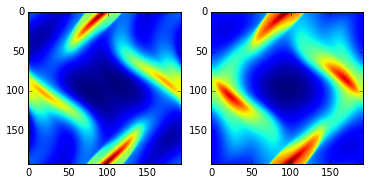

In [45]:
#
# Plot density field
#
fig1,ax1 = pyplot.subplots(1,2,num=1)

ax1[0].imshow(rho)
ax1[1].imshow(e)


#import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

#imgplot = plt.imshow(rho)
#imgplot.set_cmap('spectral')

#plt.plot(rho[96,:])
#print rho[96][:]




#fig1.savefig('fig1.png',dpi=fig1.get_dpi())
